In [ ]:
#import statements


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Step 1: Load the dataset
categories = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

In [6]:
# Step 2: Explore the dataset
print("Categories:", newsgroups_train.target_names)
print("Number of training samples:", len(newsgroups_train.data))
print("Number of test samples:", len(newsgroups_test.data))
print("Sample data:", newsgroups_train.data[0])


Categories: ['alt.atheism', 'sci.space']
Number of training samples: 1073
Number of test samples: 713
Sample data: From: bil@okcforum.osrhe.edu (Bill Conner)
Subject: Re: Not the Omni!
Nntp-Posting-Host: okcforum.osrhe.edu
Organization: Okcforum Unix Users Group
X-Newsreader: TIN [version 1.1 PL6]
Lines: 18

Charley Wingate (mangoe@cs.umd.edu) wrote:
: 
: >> Please enlighten me.  How is omnipotence contradictory?
: 
: >By definition, all that can occur in the universe is governed by the rules
: >of nature. Thus god cannot break them. Anything that god does must be allowed
: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts
: >the rules of nature.
: 
: Obviously, an omnipotent god can change the rules.

When you say, "By definition", what exactly is being defined;
certainly not omnipotence. You seem to be saying that the "rules of
nature" are pre-existant somehow, that they not only define nature but
actually cause it. If that's what you mean I'd like to hear 

In [7]:
# Step 3: Data Preprocessing
# Vectorizing the text data (convert text to numerical features)
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(newsgroups_train.data)


In [8]:
# Transform the counts to a normalized tf-idf representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [9]:
# Step 4: Train the Naive Bayes Model
clf = MultinomialNB()
clf.fit(X_train_tfidf, newsgroups_train.target)

MultinomialNB()

In [10]:
# Step 5: Make Predictions
X_test_counts = count_vectorizer.transform(newsgroups_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predicted = clf.predict(X_test_tfidf)


In [12]:
# Step 6: Evaluate the Model
accuracy = accuracy_score(newsgroups_test.target, predicted)
precision = precision_score(newsgroups_test.target, predicted, average='macro')
recall = recall_score(newsgroups_test.target, predicted, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.9775596072931276
Precision: 0.9790565221570701
Recall: 0.975816717852426


In [13]:

# Detailed Evaluation
conf_matrix = confusion_matrix(newsgroups_test.target, predicted)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(newsgroups_test.target, predicted, target_names=categories)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[306  13]
 [  3 391]]
Classification Report:
               precision    recall  f1-score   support

 alt.atheism       0.99      0.96      0.97       319
   sci.space       0.97      0.99      0.98       394

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713



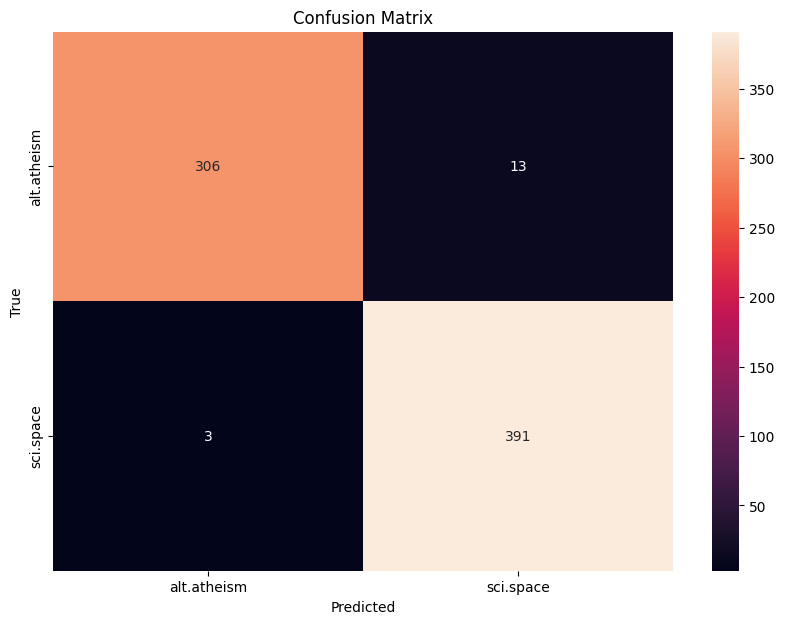

In [14]:
# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# Step 7: Create a Pipeline (for future use and convenience)
text_clf = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())
text_clf.fit(newsgroups_train.data, newsgroups_train.target)

# Predict using the pipeline
predicted_pipeline = text_clf.predict(newsgroups_test.data)


Pipeline Accuracy: 0.9775596072931276
Pipeline Precision: 0.9790565221570701
Pipeline Recall: 0.975816717852426


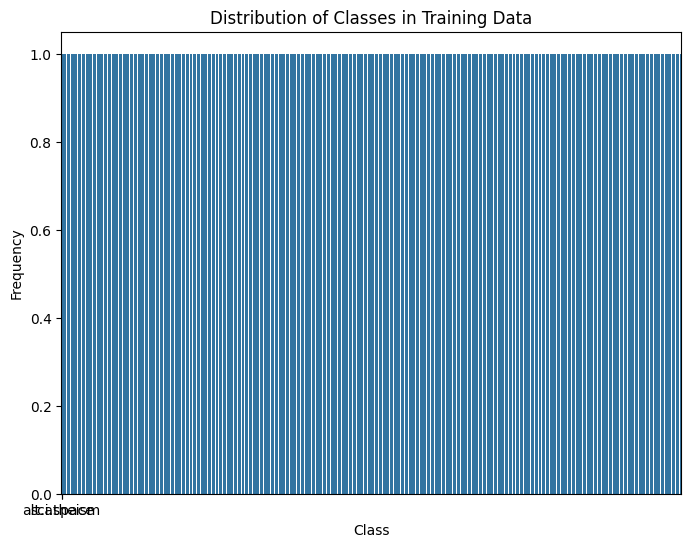

In [17]:
# Evaluate the pipeline model
accuracy_pipeline = accuracy_score(newsgroups_test.target, predicted_pipeline)
precision_pipeline = precision_score(newsgroups_test.target, predicted_pipeline, average='macro')
recall_pipeline = recall_score(newsgroups_test.target, predicted_pipeline, average='macro')

print(f"Pipeline Accuracy: {accuracy_pipeline}")
print(f"Pipeline Precision: {precision_pipeline}")
print(f"Pipeline Recall: {recall_pipeline}")

# Additional visualization: Distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(newsgroups_train.target)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=categories)
plt.show()

In [18]:
# Analyze misclassifications
misclassified_indices = np.where(newsgroups_test.target != predicted)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")
for i in range(5):  # Display a few examples
    idx = misclassified_indices[i]
    print(f"Original: {categories[newsgroups_test.target[idx]]}, Predicted: {categories[predicted[idx]]}")
    print(newsgroups_test.data[idx])
    print("----")

Number of misclassified samples: 16
Original: alt.atheism, Predicted: sci.space
From: Edwin Gans
Subject: Atheism
Nntp-Posting-Host: 47.107.76.97
Organization: Bell-Northern Research
Lines: 1

 

----
Original: alt.atheism, Predicted: sci.space
From: aaron@minster.york.ac.uk
Subject: Re: Death Penalty / Gulf War (long)
Distribution: world
Organization: Department of Computer Science, University of York, England
Lines: 22

Shamim Zvonko Mohamed (sham@cs.arizona.edu) wrote:
: BULLSHIT!!! In the Gulf Massacre, 7% of all ordnance used was "smart." The
: rest - that's 93% - was just regular, dumb ol' iron bombs and stuff. Have
: you forgotten that the Pentagon definition of a successful Patriot launch
: was when the missile cleared the launching tube with no damage? Or that a
: successful interception of a Scud was defined as "the Patriot and Scud
: passed each other in the same area of the sky"?
: 
: And of the 7% that was the "smart" stuff, 35% hit. Again - try to follow me
: here - that 

In [19]:
# Save the model (optional)
import joblib
joblib.dump(text_clf, 'text_classifier_model.pkl')
print("Model saved as 'text_classifier_model.pkl'")


Model saved as 'text_classifier_model.pkl'


In [20]:

# Load the model (optional)
loaded_model = joblib.load('text_classifier_model.pkl')
print("Loaded model and re-evaluate:")
loaded_predicted = loaded_model.predict(newsgroups_test.data)
loaded_accuracy = accuracy_score(newsgroups_test.target, loaded_predicted)
print(f"Loaded Model Accuracy: {loaded_accuracy}")

Loaded model and re-evaluate:
Loaded Model Accuracy: 0.9775596072931276
